In [1]:
import sys
from os import getcwd
import os
from os.path import basename, dirname
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
from scipy import stats
import random
import statsmodels
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.eval_measures import rmse
import yfinance as yf
import argparse
import sys



/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import darts
from darts.models import NBEATSModel,BlockRNNModel,RNNModel,ExponentialSmoothing, TCNModel, TransformerModel
from statsmodels.tsa.seasonal import STL
from darts.utils.data import TrainingDataset, PastCovariatesTrainingDataset
from darts.utils.data import PastCovariatesInferenceDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, AusBeerDataset
from darts.dataprocessing.transformers.boxcox import BoxCox

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset



In [3]:
seed = np.random.randint(low = 0,high = 1000)
print(seed)

datasets = ['AirPassengers']
data, seasonality = get_dataset(datasets[0]) 

models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER','TCN']
#models = ['TCN']
split = 0.7
reps = 1
inlen = 12
outlen = 6

758


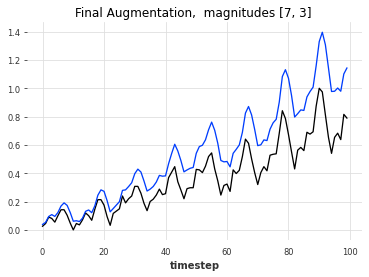

2022-07-28 11:31:48 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:31:48 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:31:48 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:31:48 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:31:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:31:51 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:31:51 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 138.54it/s, loss=0.00282, train_loss=0.00208]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


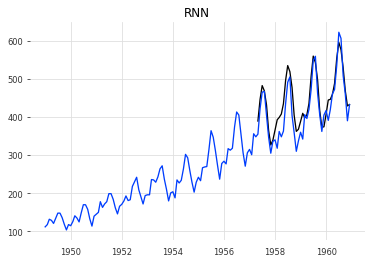

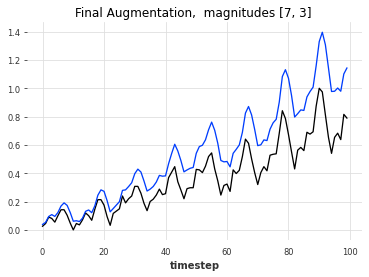

2022-07-28 11:32:01 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:32:01 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:32:01 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:32:01 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:32:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:32:01 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:32:01 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 43.83it/s, loss=0.000291, train_loss=0.000157]


2022-07-28 11:32:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


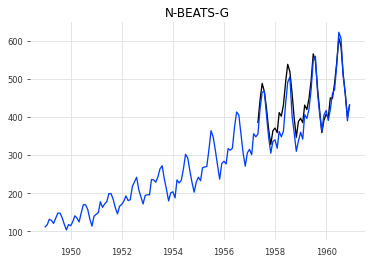

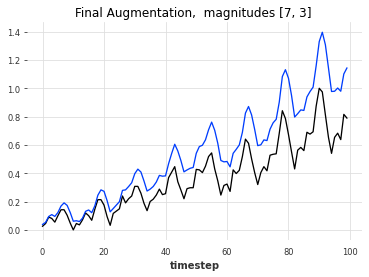

2022-07-28 11:32:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:32:35 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:32:35 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:32:35 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:32:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:32:35 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:32:35 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 71.18it/s, loss=0.000148, train_loss=9.7e-5]  


2022-07-28 11:32:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:32:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


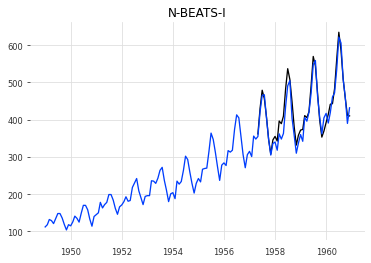

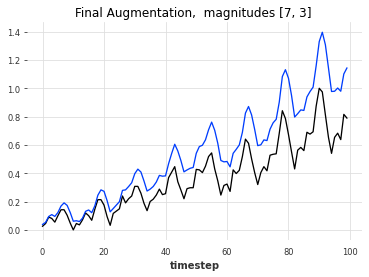

2022-07-28 11:32:52 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:32:52 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:32:52 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:32:52 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:32:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:32:52 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:32:52 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 70.84it/s, loss=0.00183, train_loss=0.00332] 


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


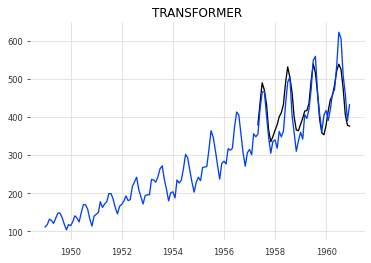

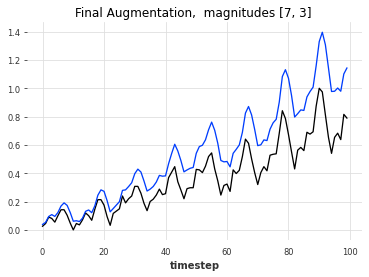

2022-07-28 11:33:12 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-28 11:33:12 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:33:12 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:33:13 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:33:13 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:33:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:33:13 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:33:13 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 117.56it/s, loss=0.0212, train_loss=0.0283] 


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


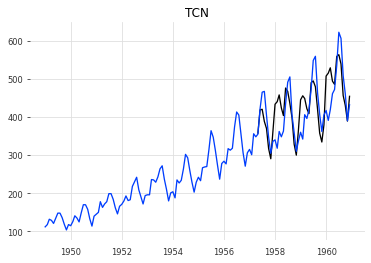

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AirPassengers,RNN,7.357,35.198,6.973,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,N-BEATS-G,6.427,30.225,6.132,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,N-BEATS-I,4.532,22.578,4.419,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,TRANSFORMER,7.874,38.814,7.687,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,TCN,11.554,57.918,10.997,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."


In [4]:
aug_n = 2
aug_m = [7,3]
aug_p = [(np.array(list(da.ranges.keys()))=='Scale').astype(int),
        (np.array(list(da.ranges.keys()))=='Smooth ETS').astype(int)]
mix1_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mix1_results

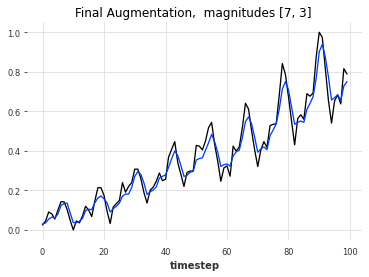

2022-07-28 11:33:24 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:33:24 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:33:24 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:33:24 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:33:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:33:24 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:33:24 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 125.90it/s, loss=0.00146, train_loss=0.000754]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


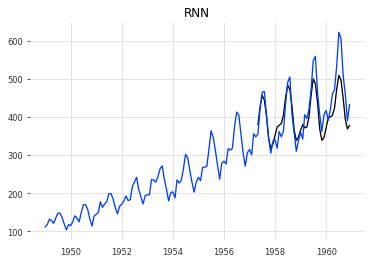

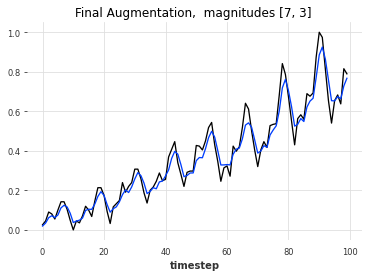

2022-07-28 11:33:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:33:35 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:33:35 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:33:35 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:33:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:33:35 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:33:35 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 33.12it/s, loss=0.000125, train_loss=0.000197]


2022-07-28 11:34:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


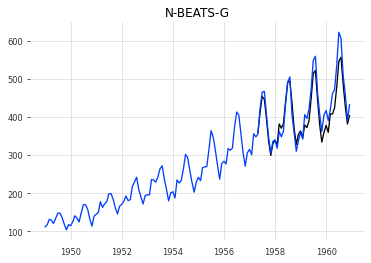

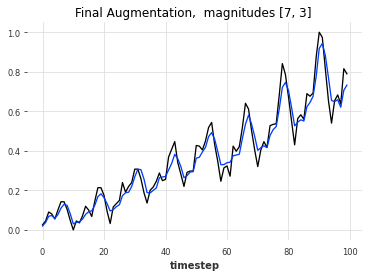

2022-07-28 11:34:13 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:34:13 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:34:13 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:34:13 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:34:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:34:13 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:34:13 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 82.12it/s, loss=0.000256, train_loss=0.000251]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


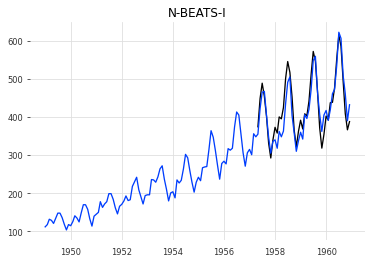

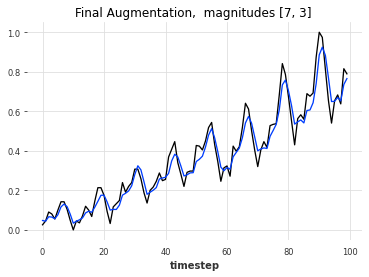

2022-07-28 11:34:30 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:34:30 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:34:30 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:34:30 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:34:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:34:30 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:34:30 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 60.26it/s, loss=0.00104, train_loss=0.00184] 


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


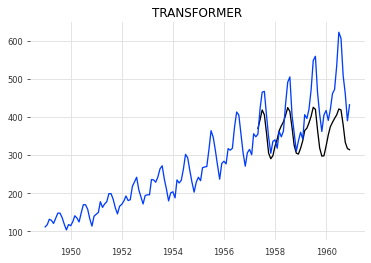

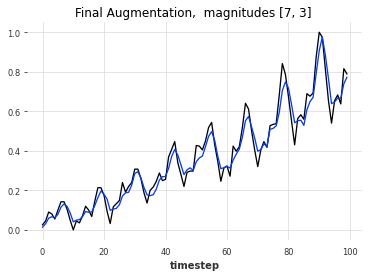

2022-07-28 11:34:51 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-28 11:34:51 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:34:51 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:34:51 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:34:51 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:34:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:34:51 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:34:51 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 112.18it/s, loss=0.0134, train_loss=0.0214] 


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


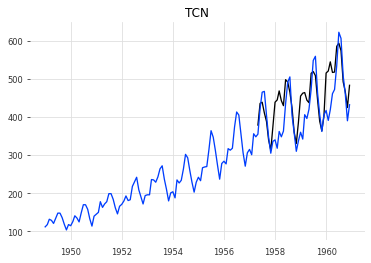

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AirPassengers,RNN,7.392,41.638,7.604,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]..."
0,AirPassengers,N-BEATS-G,5.191,28.312,5.33,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]..."
0,AirPassengers,N-BEATS-I,6.171,30.332,6.07,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]..."
0,AirPassengers,TRANSFORMER,14.034,79.358,15.491,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]..."
0,AirPassengers,TCN,11.768,59.672,10.774,0.0,0.0,0.0,2,"[7, 3]","[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]..."


In [5]:
aug_n = 2
aug_m = [7,3]
aug_p = [(np.array(list(da.ranges.keys()))=='MBB').astype(int),
        (np.array(list(da.ranges.keys()))=='Smooth ETS').astype(int)]
mix2_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mix2_results

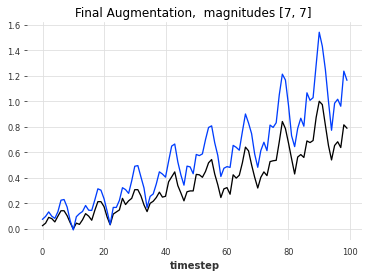

2022-07-28 11:35:03 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:35:03 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:35:03 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:35:03 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:35:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:35:03 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:35:03 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 120.60it/s, loss=0.00424, train_loss=0.00434]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


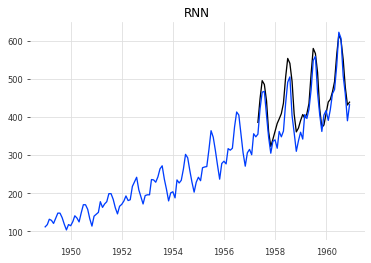

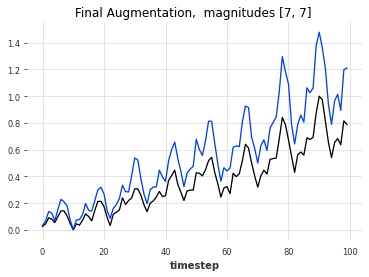

2022-07-28 11:35:13 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:35:13 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:35:13 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:35:13 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:35:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:35:13 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:35:13 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 36.69it/s, loss=0.000544, train_loss=0.0003]  


2022-07-28 11:35:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:35:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:35:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


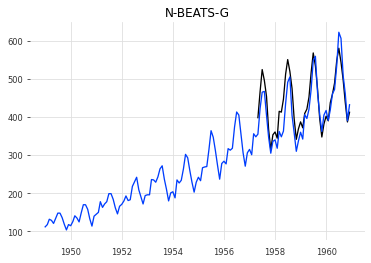

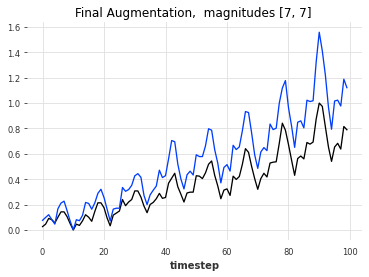

2022-07-28 11:35:51 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:35:51 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:35:51 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:35:51 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:35:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:35:51 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:35:51 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 91.16it/s, loss=0.000522, train_loss=0.000455]


2022-07-28 11:36:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


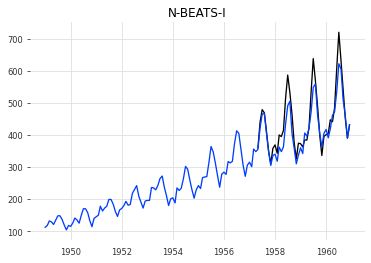

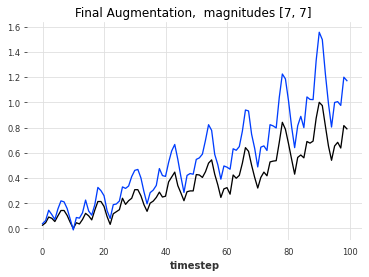

2022-07-28 11:36:09 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:36:09 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:36:09 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:36:09 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:36:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:36:09 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:36:09 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 66.14it/s, loss=0.00165, train_loss=0.00327] 


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


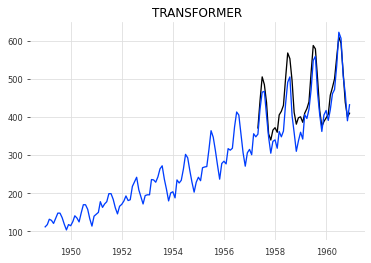

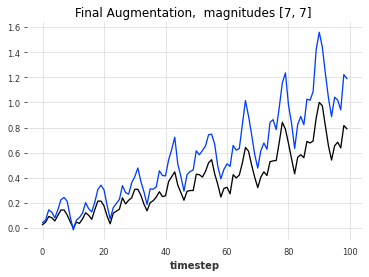

2022-07-28 11:36:29 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-28 11:36:29 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:36:29 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:36:29 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:36:29 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:36:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:36:29 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:36:29 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 127.98it/s, loss=0.0278, train_loss=0.0352]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]

2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


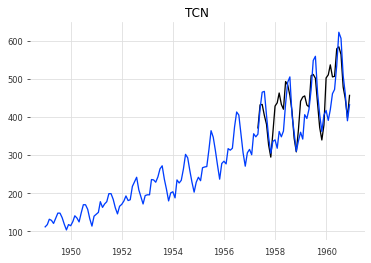

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AirPassengers,RNN,8.0,38.216,7.558,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,N-BEATS-G,7.387,36.739,7.071,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,N-BEATS-I,6.417,38.135,6.121,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,TRANSFORMER,8.387,39.282,7.928,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."
0,AirPassengers,TCN,10.978,55.052,10.255,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]..."


In [6]:
aug_n = 2
aug_m = [7,7]
aug_p = [(np.array(list(da.ranges.keys()))=='Scale').astype(int),
        (np.array(list(da.ranges.keys()))=='MBB').astype(int)]
mix3_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mix3_results

# Save results

In [7]:
results = []
results.append(mix1_results)
results.append(mix2_results)
results.append(mix3_results)

aug_results = pd.concat(results)
aug_results['seed']  = seed

In [8]:
aug_results.to_excel(datasets[0]+"/seed_"+str(seed)+"_augmix_results1.xlsx")